## model_evaluation
* plot auc curves of the winner random forest and other finalists

In [64]:
from __future__ import print_function, division


import psycopg2 as pg
import pandas as pd
import pandas.io.sql as pd_sql

import pickle
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [26]:
with open('~/proj3/submission/data/X_train.pkl', 'rb') as fp:
    X_train = pickle.load(fp)
with open('~/proj3/submission/data/X_test.pkl', 'rb') as fp:
    X_test = pickle.load(fp)
with open('~/proj3/submission/data/y_train.pkl', 'rb') as fp:
    y_train = pickle.load(fp)
with open('~/proj3/submission/data/y_test.pkl', 'rb') as fp:
    y_test = pickle.load(fp)
with open('~/proj3/submission/data/best_rf.pkl', 'rb') as fp:
    best_rf = pickle.load(fp)
with open('~/proj3/submission/data/best_knn.pkl', 'rb') as fp:
    best_knn = pickle.load(fp)
with open('~/proj3/submission/data/best_logreg.pkl', 'rb') as fp:
    best_logreg = pickle.load(fp)

In [50]:
y_test = y_test.replace('ADOPTION',0)
y_test = y_test.replace('not_adopted',1)

In [31]:
y_predicted = best_rf.predict(X_test)

In [42]:
y_predicted = pd.DataFrame(y_predicted)
y_predicted[0].replace('not_adopted',1,inplace=True)
y_predicted[0].replace('ADOPTION',0,inplace=True)

In [48]:
y_predicted[0].value_counts()

1    34693
0     7613
Name: 0, dtype: int64

In [51]:
y_test.value_counts()

1    34633
0     7673
Name: outcometype, dtype: int64

In [52]:
#random forest f1 score
f1_score(y_test,y_predicted[0])

0.9604765888699766

In [65]:
models = [best_rf,best_logreg, best_knn]
model_names = ["Random Forest",'Logistic','Knn']

In [67]:
roc_plotting_stuff = []
for clf, name in zip(models, model_names):
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, preds[:,1])
    auc_score = auc(fpr, tpr)
    roc_plotting_stuff.append((name, tpr, fpr, auc_score))

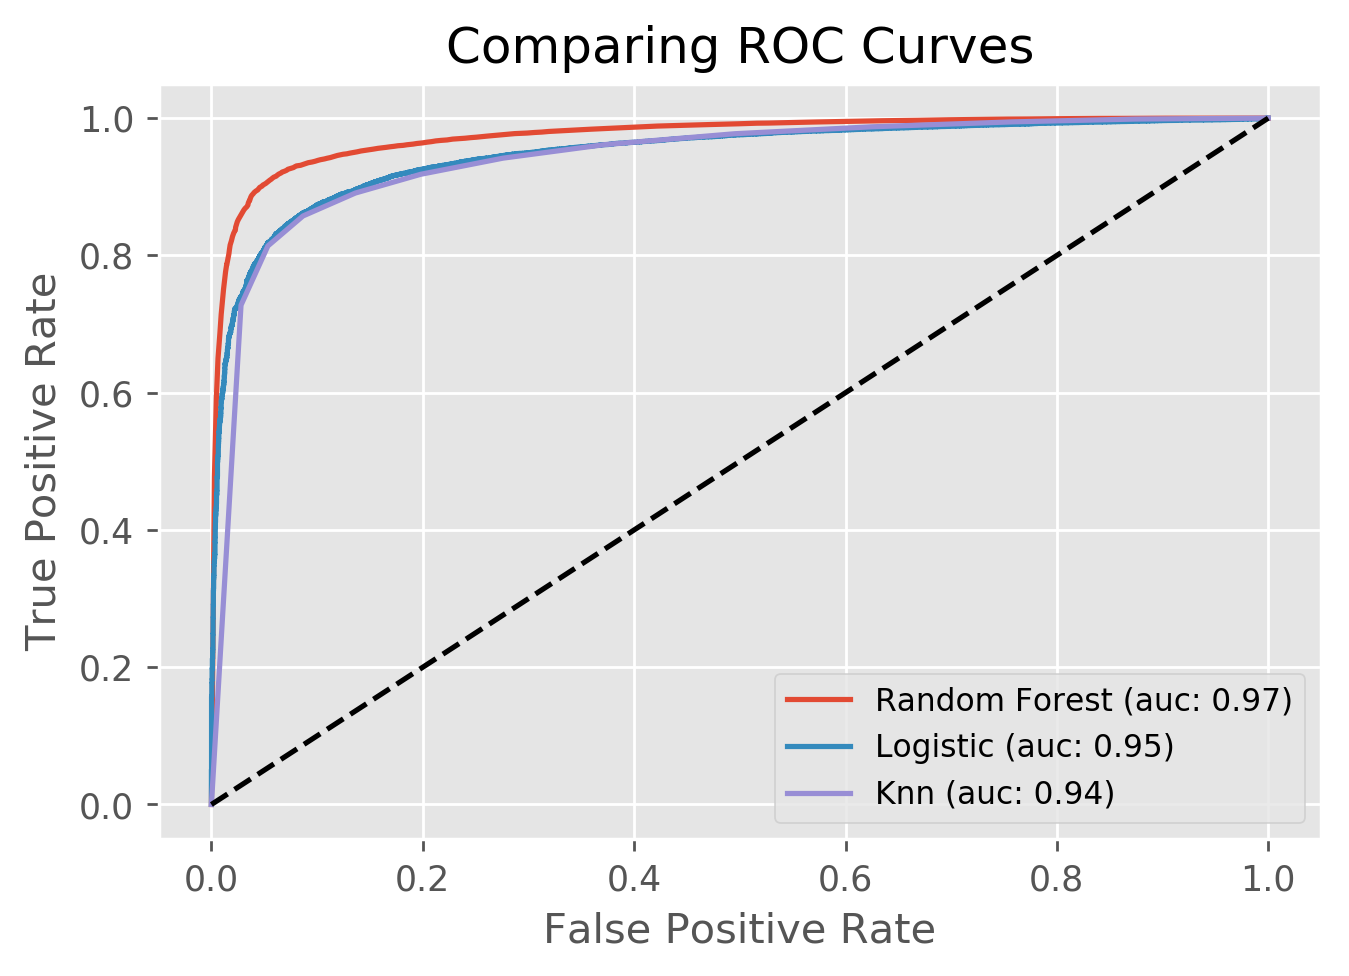

In [68]:
plt.figure(dpi=250)
for name, tpr, fpr, auc_score in roc_plotting_stuff:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparing ROC Curves");